In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [15]:
combined_df = pd.read_csv("../../data/cri_annotations.csv")
combined_df.head(100)

,question_id,chunk_header,text,question,reference,candidate,score,annotator,labels
0,38f590ee-1964-4a7c-9625-53b53cb8a9f0,0.1 Affect Detection from Student Activity Data,Affective states cannot be directly measured b...,What approach was used to infer affect by anal...,"The interaction-based, log-file based, or sens...",learning,1.0,langdon,0
1,95784937-f565-4450-bfad-babc2399d667,0.1 Affect Detection from Student Activity Data,Affective states cannot be directly measured b...,What approach was used to infer affect by anal...,"The interaction-based, log-file based, or sens...",answer,1.0,langdon,0
2,88c0f433-7fdb-48ad-9898-a08d861635e1,0.1 Affect Detection from Student Activity Data,Affective states cannot be directly measured b...,What approach was used to infer affect by anal...,"The interaction-based, log-file based, or sens...",human observers made live annotations regardin...,3.0,langdon,1
3,53c99817-a318-45e5-a918-6b2e7dd4e8d1,0.1 Affect Detection from Student Activity Data,Affective states cannot be directly measured b...,What approach was used to infer affect by anal...,"The interaction-based, log-file based, or sens...",Recorded data from student while doing help ba...,3.0,langdon,1
4,9f3eeb88-7254-402f-b025-b3c0298e2a64,0.1 Affect Detection from Student Activity Data,Affective states cannot be directly measured b...,What approach was used to infer affect by anal...,"The interaction-based, log-file based, or sens...",analyzing context,2.0,langdon,1
...,...,...,...,...,...,...,...,...,...
95,d854e8bb-e9d7-41f2-b3f5-83a9ea1408d5,1.4 Teacher Analytics,Teachers should not be left out of the loop si...,What are researchers developing methods for in...,Researchers are developing methods for automat...,experiment,1.0,Wes,0
96,d7fbc1d6-ff0d-4b98-a3e4-79b668d3c842,1.4 Teacher Analytics,Teachers should not be left out of the loop si...,What are researchers developing methods for in...,Researchers are developing methods for automat...,answer,1.0,Wes,0
97,ef4e7e89-2fcc-4598-8755-1b405d651d65,1.4 Teacher Analytics,Teachers should not be left out of the loop si...,What are researchers developing methods for in...,Researchers are developing methods for automat...,SEAT interface,1.0,Wes,0
98,e6d354ee-5306-4351-a29c-ef2ce144a5cb,1.4 Teacher Analytics,Teachers should not be left out of the loop si...,What are researchers developing methods for in...,Researchers are developing methods for automat...,"observational protocols, video analysis, self-...",3.0,Wes,1


In [4]:
score_stats = combined_df["score"].describe()
print("Descriptive Statistics for Score:")
print(score_stats)

skewness = combined_df["score"].skew()
kurtosis = combined_df["score"].kurt()
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)

Descriptive Statistics for Score:
count    490.000000
mean       2.624490
std        1.095544
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: score, dtype: float64

Skewness: -0.1794105492872431
Kurtosis: -1.2750329515112948


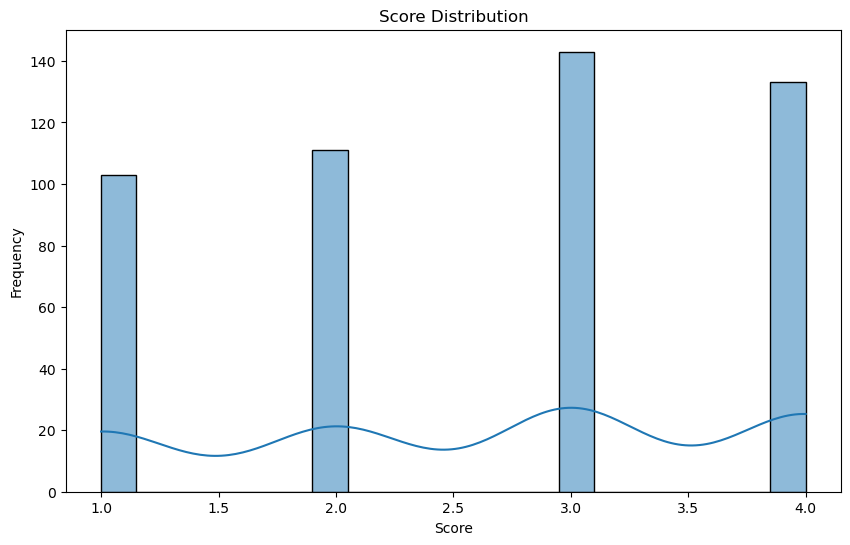

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_df["score"], kde=True, bins=20)
plt.title("Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

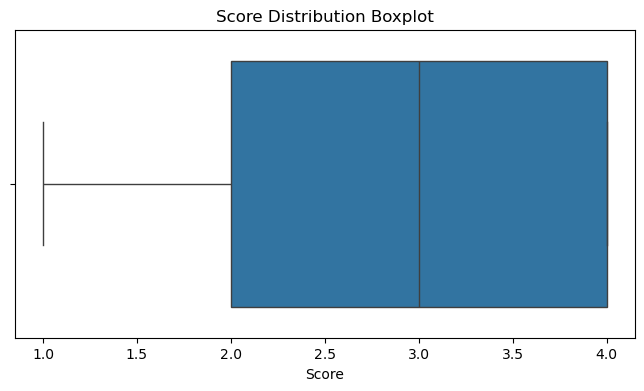

In [6]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=combined_df["score"])
plt.title("Score Distribution Boxplot")
plt.xlabel("Score")
plt.show()

In [7]:
def compute_stats(series):
    desc = series.describe()
    return pd.Series(
        {
            "count": desc["count"],
            "mean": desc["mean"],
            "std": desc["std"],
            "min": desc["min"],
            "25%": desc["25%"],
            "50%": desc["50%"],
            "75%": desc["75%"],
            "max": desc["max"],
            "skew": series.skew(),
            "kurt": series.kurt(),
        }
    )


print("=== Statistics by Person ===\n")
name_groups = combined_df.groupby("annotator")
for name, group in name_groups:
    print(f"Name: {name}")
    stats = compute_stats(group["score"])
    print(stats, "\n")

print("=== Statistics by Person and Question ===\n")
question_groups = combined_df.groupby(["annotator", "question"])
for (name, question), group in question_groups:
    print(f"Name: {name} | Question: {question}")
    stats = compute_stats(group["score"])
    print(stats, "\n")

=== Statistics by Person ===

Name: Adithya
count    30.000000
mean      2.233333
std       1.222866
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
skew      0.368962
kurt     -1.484021
dtype: float64 

Name: Anna
count    30.000000
mean      2.966667
std       0.889918
min       1.000000
25%       2.250000
50%       3.000000
75%       4.000000
max       4.000000
skew     -0.561034
kurt     -0.265386
dtype: float64 

Name: David
count    30.000000
mean      2.533333
std       1.041661
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       4.000000
skew     -0.094722
kurt     -1.101618
dtype: float64 

Name: Jesse
count    30.000000
mean      2.833333
std       0.985527
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       4.000000
skew     -0.338800
kurt     -0.889755
dtype: float64 

Name: Joon
count    30.000000
mean      3.066667
std       1.048261
min       1.000000
25%   

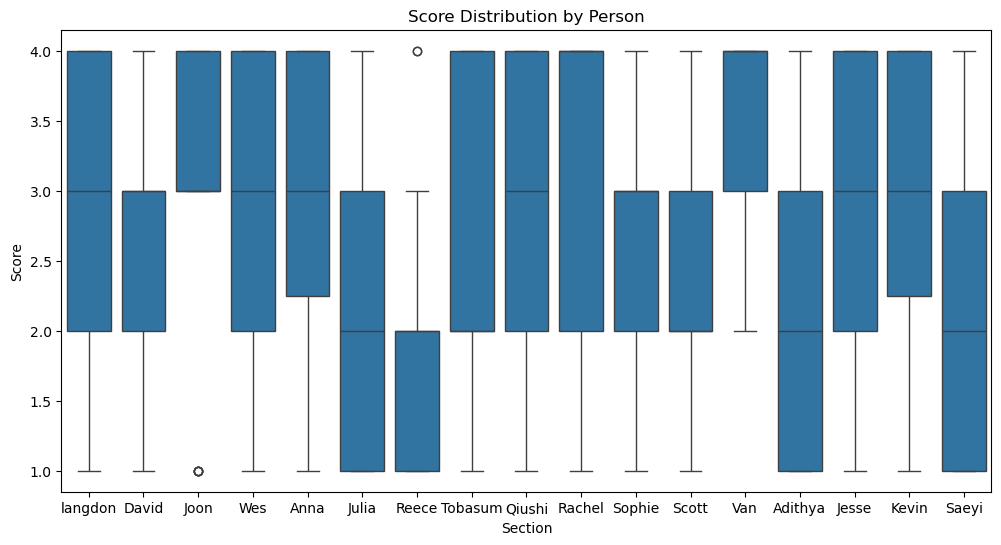

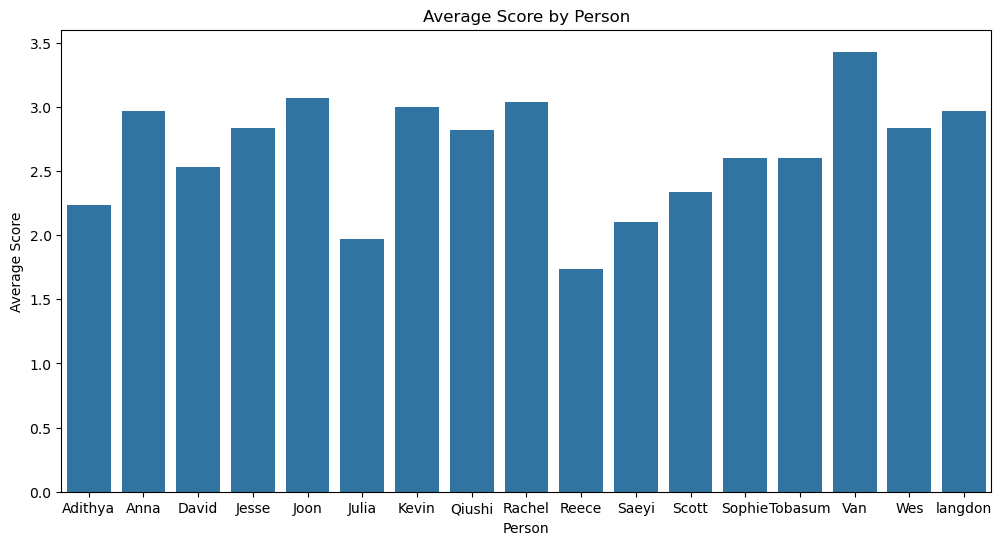

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="annotator", y="score", data=combined_df)
plt.title("Score Distribution by Person")
plt.xlabel("Section")
plt.ylabel("Score")
plt.show()

avg_scores_by_section = combined_df.groupby("annotator")["score"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x="annotator", y="score", data=avg_scores_by_section)
plt.title("Average Score by Person")
plt.xlabel("Person")
plt.ylabel("Average Score")
plt.show()

Average Score for Each Question:
                                             question     score
0   How can we abstract 'doing something N times' ...  2.000000
1   How can you create and update bindings in Java...  2.500000
2   How do self-regulating learners adapt their sk...  2.296296
3   What approach was used to infer affect by anal...  2.966667
4   What are examples of cases where state legisla...  2.333333
..                                                ...       ...
69     Why are abstractions important in programming?  3.333333
70  Why are spaces and line breaks not required in...  3.000000
71  Why is evaluation of information visualization...  2.250000
72  Why is it important to incorporate emotion int...  2.866667
73  Why might low-income countries have an advanta...  1.733333

[74 rows x 2 columns]


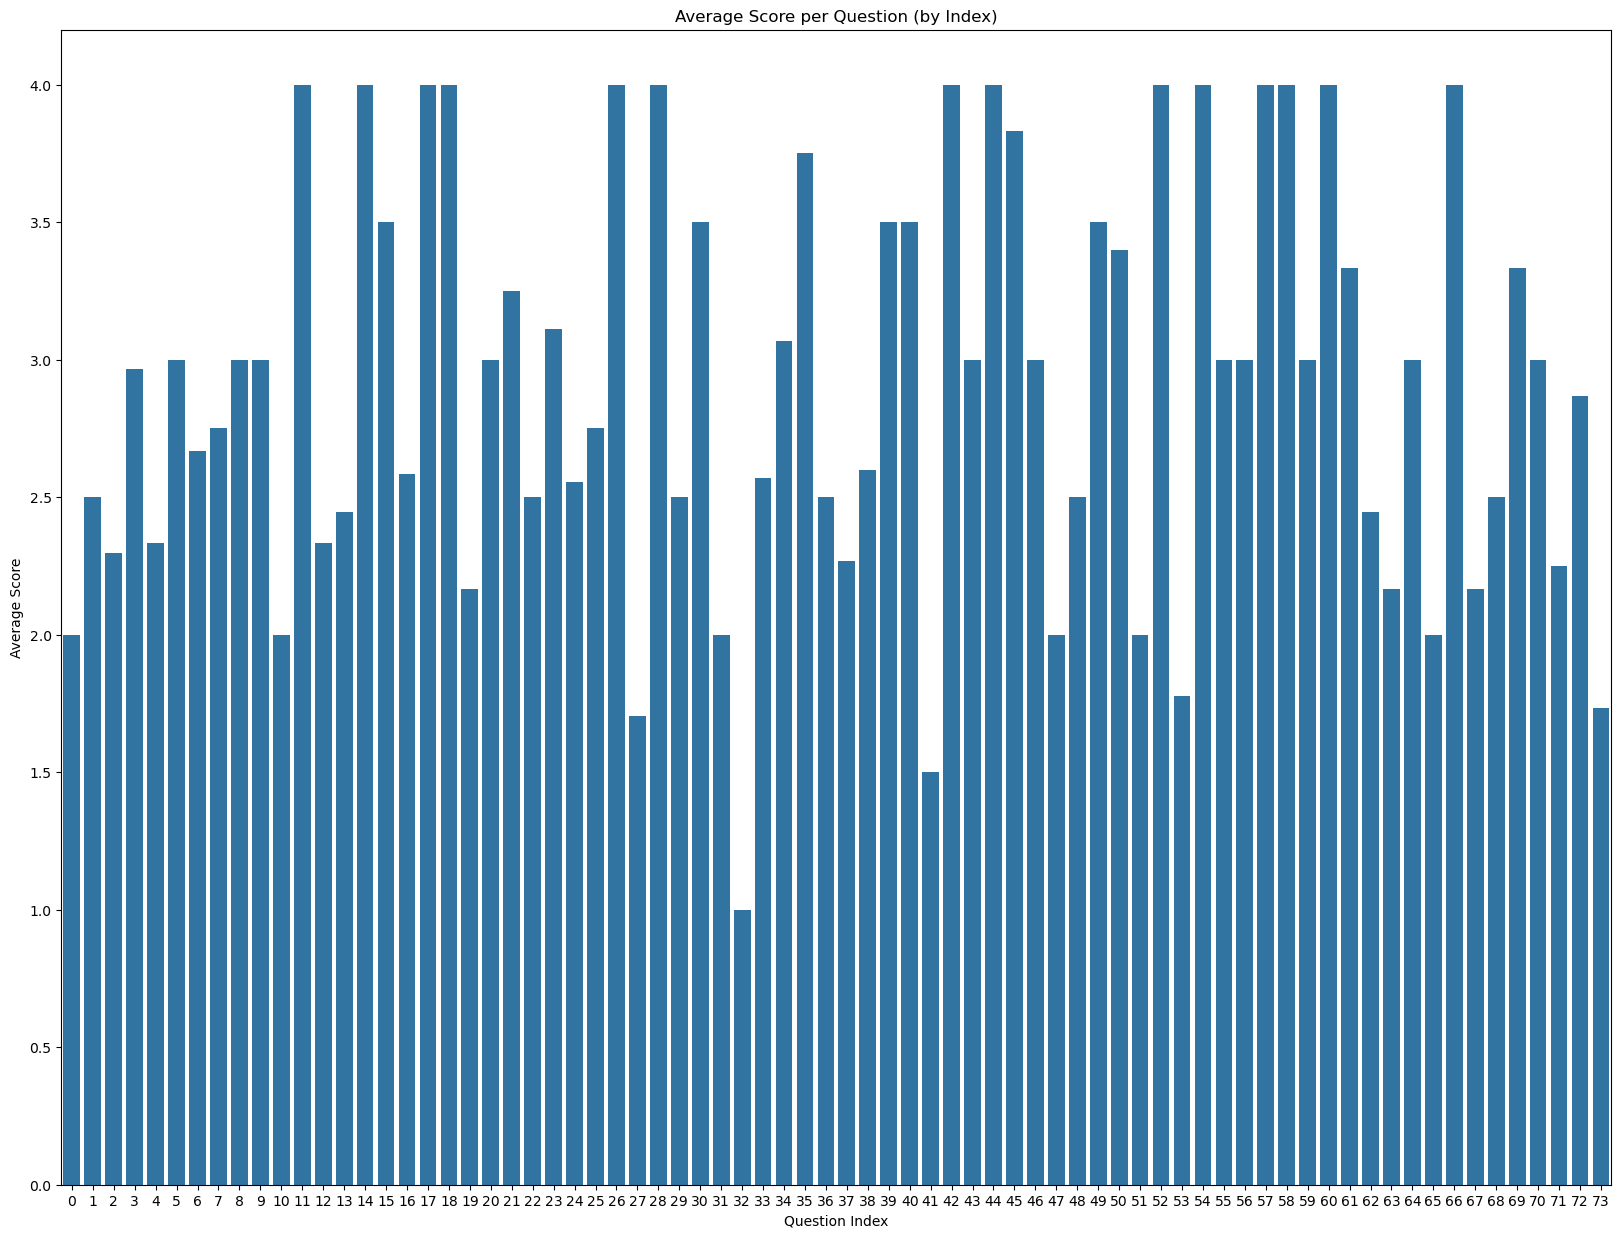

In [9]:
clean_df = combined_df.dropna(subset=["score"])

avg_scores_by_question = clean_df.groupby("question")["score"].mean().reset_index()
print("Average Score for Each Question:")
print(avg_scores_by_question)

avg_scores_by_question["question_index"] = avg_scores_by_question.index

plt.figure(figsize=(20, 15))
sns.barplot(data=avg_scores_by_question, x="question_index", y="score")

plt.xlabel("Question Index")
plt.ylabel("Average Score")
plt.title("Average Score per Question (by Index)")

plt.show()

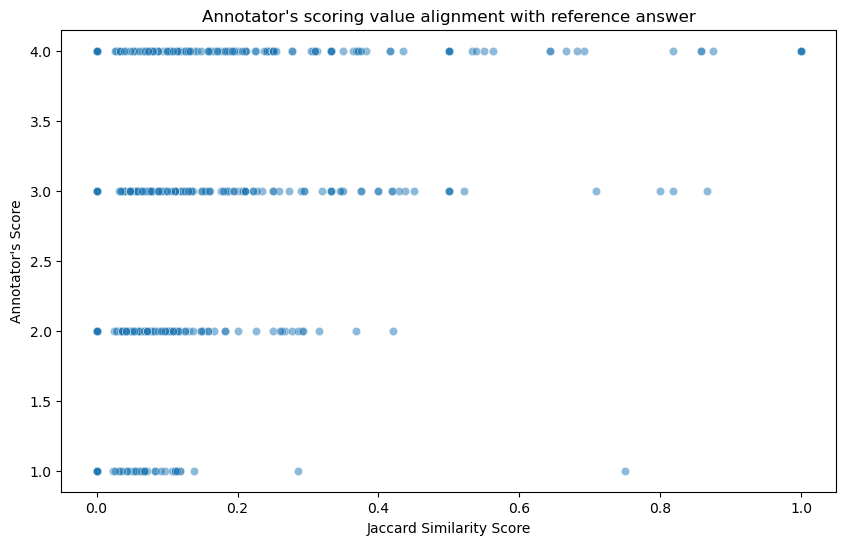

In [13]:
# Similarity I want to look: how much ["candidate"] (which will be the answer of participants) overlaps with ["reference"]


def jac_sim(text1, text2):
    set1 = set(str(text1).lower().split())
    set2 = set(str(text2).lower().split())
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union) if len(union) > 0 else 0


combined_df["similarity_to_reference"] = combined_df.apply(
    lambda row: jac_sim(row["candidate"], row["reference"]), axis=1
)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x="similarity_to_reference", y="score", alpha=0.5)
plt.title("Annotator's scoring value alignment with reference answer")
plt.xlabel("Jaccard Similarity Score")
plt.ylabel("Annotator's Score")
plt.show()

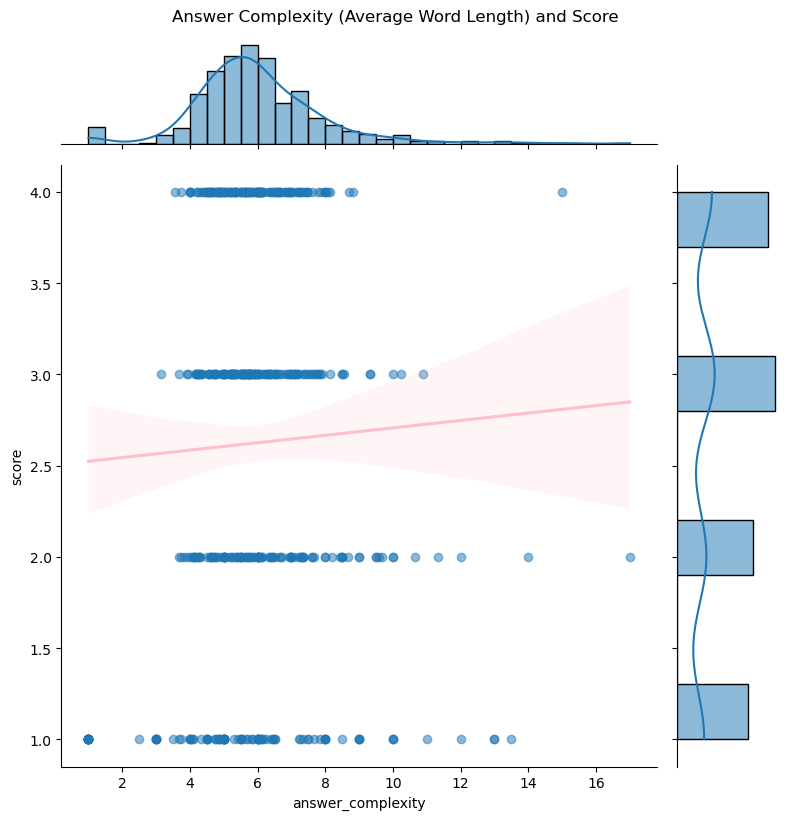

In [19]:
def avg_word_length(text):
    words = str(text).split()
    if len(words) == 0:
        return 0
    return sum(len(word) for word in words) / len(words)


combined_df["answer_complexity"] = combined_df["candidate"].apply(avg_word_length)

sns.jointplot(
    data=combined_df,
    x="answer_complexity",
    y="score",
    kind="reg",
    height=8,
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "pink"},
)
plt.suptitle("Answer Complexity (Average Word Length) and Score", y=1.02)
plt.show()

/tmp/ipykernel_342/3734030334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x='annotator', y='score', inner='quartile', palette='viridis')


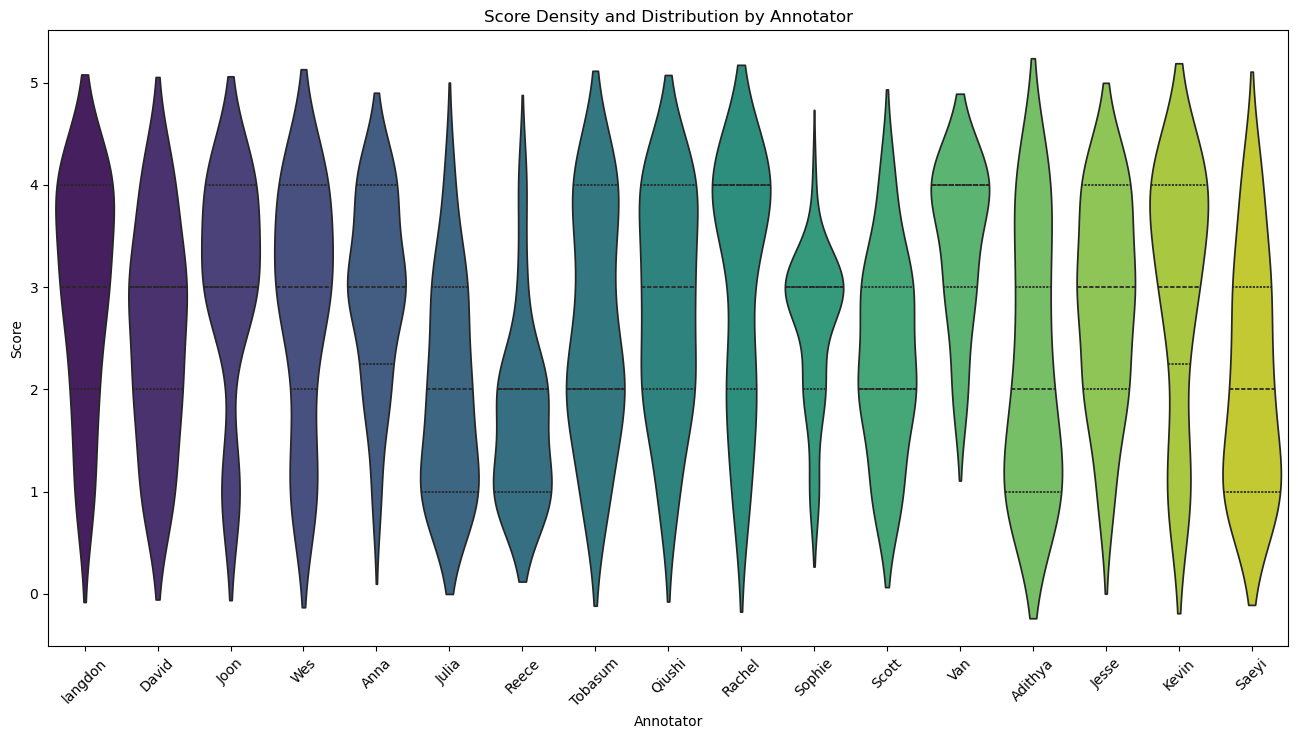

In [16]:
plt.figure(figsize=(16, 8))
sns.violinplot(
    data=combined_df, x="annotator", y="score", inner="quartile", palette="viridis"
)
plt.title("Score Density and Distribution by Annotator")
plt.xlabel("Annotator")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()